In [1]:
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
caffe_path= "/content/drive/MyDrive/Colab Notebooks/ProjectData/FaceRecognition/face_detection_model/res10_300x300_ssd_iter_140000.caffemodel"
proto_path = "/content/drive/MyDrive/Colab Notebooks/ProjectData/FaceRecognition/face_detection_model/deploy.prototxt"
model_path = '/content/drive/MyDrive/Colab Notebooks/ProjectData/FaceRecognition/pickle/checkpoint/holly_MobileNet_3(50_class).h5'
label_path = '/content/drive/My Drive/Colab Notebooks/ProjectData/FaceRecognition/pickle/holly_50_classes_lableencoder.pickle'
validation_set = '/content/drive/MyDrive/Colab Notebooks/ProjectData/FaceRecognition/pickle/val1622412457(50_class).pickle'

In [3]:


detector = cv2.dnn.readNetFromCaffe(proto_path, caffe_path)

model = keras.models.load_model(model_path)

labelencoder = pickle.load(open(label_path,'rb'))

data = pickle.load(open(validation_set,'rb'))

In [ ]:

c = 0
count = 0
pred1 = []
actual1 = []
prob = []

for img,actual in data:

    img = img.astype(np.float32) / 255.0
    np_img = img[np.newaxis,:, :,:]
    preds = model.predict(np_img)
    out = np.argmax(preds)
    name = labelencoder.get(out)

    actual1.append(actual)
    pred1.append(out)
    prob.append(np.max(preds))

    if actual == out:
      count += 1
    c+= 1

print(actual1,pred1)
print(count/c)


[49, 25, 46, 32, 24, 21, 14, 37, 42, 40, 30, 6, 6, 40, 39, 49, 2, 1, 35, 2, 29, 3, 19, 35, 24, 23, 40, 18, 40, 46, 8, 25, 28, 3, 0, 10, 6, 32, 11, 28, 28, 37, 1, 41, 41, 29, 16, 10, 9, 18, 6, 8, 34, 9, 45, 35, 49, 24, 4, 47, 20, 31, 43, 26, 37, 10, 34, 27, 27, 16, 24, 21, 48, 20, 14, 6, 32, 7, 35, 15, 40, 9, 2, 16, 3, 1, 13, 30, 16, 25, 16, 20, 3, 1, 4, 40, 31, 43, 18, 17, 13, 25, 46, 4, 35, 24, 21, 8, 6, 46, 37, 47, 48, 39, 29, 46, 27, 45, 37, 29, 10, 16, 24, 36, 11, 43, 48, 42, 42, 37, 9, 42, 19, 36, 37, 17, 2, 27, 35, 13, 17, 31, 35, 26, 6, 27, 38, 1, 29, 27, 2, 12, 35, 25, 16, 17, 14, 17, 11, 28, 22, 3, 47, 20, 16, 4, 26, 29, 39, 37, 9, 18, 11, 32, 31, 4, 14, 22, 0, 15, 10, 36, 34, 18, 43, 6, 27, 8, 27, 9, 18, 24, 44, 49, 31, 5, 49, 6, 37, 11, 40, 24, 38, 6, 40, 44, 11, 13, 33, 18, 25, 3, 35, 2, 12, 24, 34, 38, 42, 26, 4, 40, 0, 5, 24, 25, 8, 43, 19, 16, 27, 0, 9, 9, 22, 27, 16, 0, 5, 42, 43, 29, 14, 10, 0, 12, 42, 11, 38, 24, 35, 48, 16, 33, 14, 22, 30, 5, 37, 40, 13, 48, 37, 4, 1

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report 

In [ ]:
def to_lable(lst):
  li = []
  for i in lst:
    li.append(labelencoder.get(i)[5:])
  return li
actual_name = to_lable(actual1)
pred_name = to_lable(pred1)

In [ ]:
df = pd.DataFrame(list(zip(actual_name, pred_name)),columns =['Actual', 'Predictions'])
df

,Actual,Predictions
0,Henry Cavil,Henry Cavil
1,kiernen shipka,amber heard
2,Jake Mcdorman,Jake Mcdorman
3,Tom Holland,Tom Holland
4,Irina Shayk,Irina Shayk
...,...,...
1730,Tom Hiddleston,Tom Hiddleston
1731,Neil Patrick Harris,Neil Patrick Harris
1732,Wentworth Miller,Wentworth Miller
1733,Mark Zuckerberg,Mark Zuckerberg


In [ ]:
con_mat = pd.crosstab(df.Actual, df.Predictions)

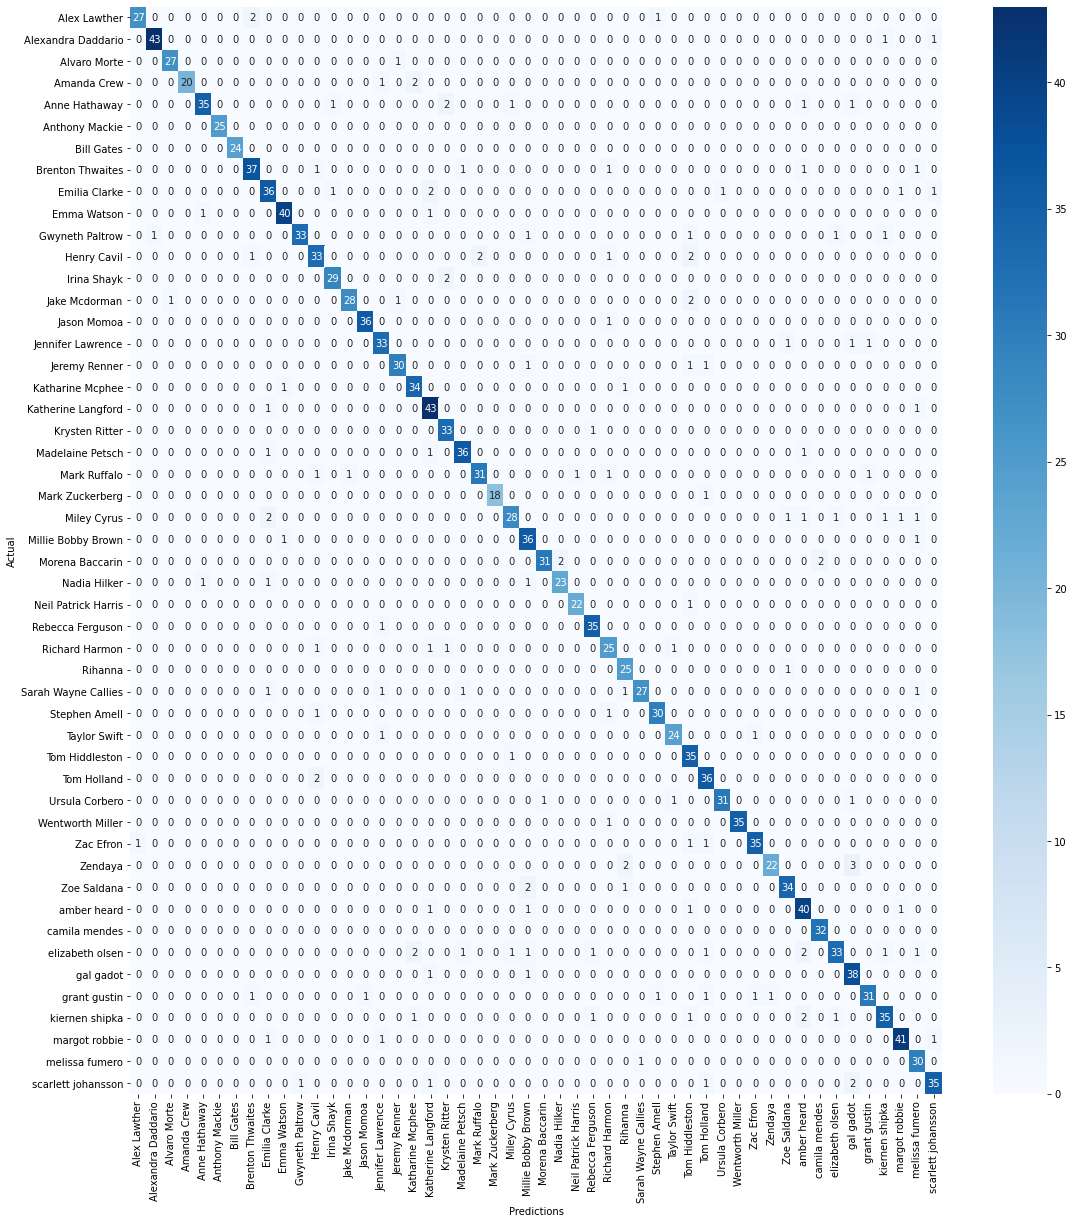

In [ ]:
plt.figure(figsize=(40,20))
plt.subplot(121)
svm = sns.heatmap(con_mat, annot=True, cmap='Blues')

figure = svm.get_figure()    
figure.savefig('/content/drive/MyDrive/Colab Notebooks/ProjectData/FaceRecognition/plots/holly_test_train_split(checkpoint_holly_MobileNet_3_test1622412457)/holly_50_class_conf_mat_heat.png', dpi=400)

In [ ]:
report = pd.DataFrame(classification_report(actual_name, pred_name, output_dict=True)).T
report

,precision,recall,f1-score,support
Alex Lawther,0.964286,0.900000,0.931034,30.000000
Alexandra Daddario,0.977273,0.955556,0.966292,45.000000
Alvaro Morte,0.964286,0.964286,0.964286,28.000000
Amanda Crew,1.000000,0.869565,0.930233,23.000000
Anne Hathaway,0.945946,0.853659,0.897436,41.000000
Anthony Mackie,1.000000,1.000000,1.000000,25.000000
Bill Gates,1.000000,1.000000,1.000000,24.000000
Brenton Thwaites,0.902439,0.880952,0.891566,42.000000
Emilia Clarke,0.837209,0.857143,0.847059,42.000000
Emma Watson,0.952381,0.952381,0.952381,42.000000


In [ ]:
pre = report.precision
rec = report.recall
f1_s = report['f1-score']

In [ ]:
f1_s

Alex Lawther           0.931034
Alexandra Daddario     0.966292
Alvaro Morte           0.964286
Amanda Crew            0.930233
Anne Hathaway          0.897436
Anthony Mackie         1.000000
Bill Gates             1.000000
Brenton Thwaites       0.891566
Emilia Clarke          0.847059
Emma Watson            0.952381
Gwyneth Paltrow        0.916667
Henry Cavil            0.846154
Irina Shayk            0.935484
Jake Mcdorman          0.918033
Jason Momoa            0.972973
Jennifer Lawrence      0.891892
Jeremy Renner          0.923077
Katharine Mcphee       0.906667
Katherine Langford     0.895833
Krysten Ritter         0.916667
Madelaine Petsch       0.923077
Mark Ruffalo           0.898551
Mark Zuckerberg        0.972973
Miley Cyrus            0.835821
Millie Bobby Brown     0.878049
Morena Baccarin        0.925373
Nadia Hilker           0.901961
Neil Patrick Harris    0.956522
Rebecca Ferguson       0.945946
Richard Harmon         0.833333
Rihanna                0.892857
Sarah Wa

In [ ]:
ls = con_mat.columns

In [ ]:

acc = []
name = []
k = con_mat.shape[0]
for i in range(0,k):
  TP = con_mat.iloc[i,i]
  FP = con_mat.iloc[i,:].sum() - TP
  FN = con_mat.iloc[:,i].sum() - TP
  TN = con_mat.sum().sum() - TP - FP - FN
  aacc = (TP + TN) / (TP + TN + FP + FN)
  acc.append(aacc)
  name.append(ls[i])
  

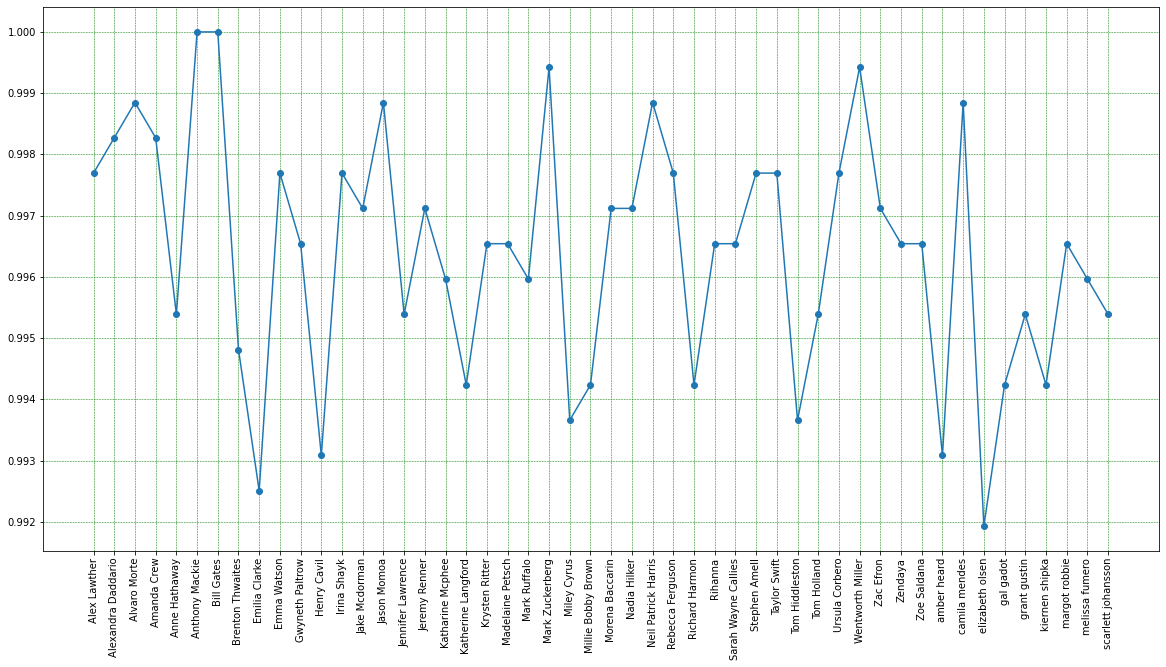

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(name,acc, marker='o')
#plt.plot(pre,marker='^')
#plt.plot(rec,marker='v')
#plt.plot(f1_s,marker='p')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ProjectData/FaceRecognition/plots/holly_test_train_split(checkpoint_holly_MobileNet_3_test1622412457)/holly_50_class_classwise_accuracy.png')

plt.show()
